# Project Extra

![](banner_project.jpg)

In [1]:
analyst = "Jason Hoang" # Replace this with your name

In [2]:
f = "setup.R"; for (i in 1:10) { if (file.exists(f)) break else f = paste0("../", f) }; source(f)
options(repr.matrix.max.rows=674)
options(repr.matrix.max.cols=200)
update_geom_defaults("point", list(size=1))                                

.................................................... start of document ....................................................

## Directions

### Objective

Recommend a portfolio of 12 company investments that maximizes 12-month return of an overall $1,000,000 investment made at the end of quarter 4 of year 2018.

### Approach

* Explore company fundamentals data for thousands of companies from quarters 1, 2, 3, and 4 of year 2017 + company stock price data for those companies from quarter 4 of year 2018.


* Explore various ways of representing the data, using variable selection, principal component analysis, cluster analysis, and other methods.


* Construct models to predict 12-month stock price growth given 12 months of past company fundamentals data, using various machine learning model construction methods.


* Develop criteria to choose company investment levels informed by the models, and estimate the models' business performance.


* Tune the models for optimal performance and select the best one.


* Use the best model applied to company fundamentals data for a set of investment opportunities for quarters 1, 2, 3, and 4 of year 2018, and accordingly recommend a portfolio of 12 company investments.

### Data

**Datasets:**<br>
Datasets comprise a list of company investment opportunities, a data dictionary, and company fundamentals for select US active, publicly held companies that reported quarterly measures including stock prices for 1st, 2nd, 3rd, and 4th quarters in years 2017 and 2018.  All non-missing stock prices exceed $3 per share.  File formats are all comma-separated values (CSV).

* Data Dictionary.csv
* Company Fundamentals 2017.csv
* Company Fundamentals 2018.csv
* Investment Opportunities.csv


**Data Source:**<br>
Wharton Research Data Services > Compustat - Capital IQ from Standard & Poor's > North America - Daily > Fundamentals Quarterly (https://wrds-www.wharton.upenn.edu/)

* Date Variable: Data Date
* Date Range: 2017-01 to 2017-12 -or- 2018-01 to 2018-12
* Company Codes: Search the entire database
  * Consolidtaion Level: C, Output
  * Industry Format: INDL, FS, Output
  * Data Format: STD, Output
  * Population Source: D, Output
  * Quarter Type: Fiscal View, Output
  * Currency: USD, Output (not CAD)
  * Company Status: Active, Output (not Inactive)
* Variable Types: Data Items, Select All (674)
* Query output:
  * Output format: comma-delimited text
  * Compression type: None
  * Data format: MMDDYY10
  
  
* For Data Dictionary: Variable Descriptions tab, copy to excel, save as csv

<br>

_**For this project, do not source any data from year 2019.**_

## Business Model

Business model is ...

$$ \begin{align} profit = \left( \sum_{i \in portfolio} (1 + growth_i) \times allocation_i \right) - budget \end{align} $$

<br>

$$ profit\,rate = profit \div budget $$


$$ \begin{align} budget = \sum_{i \in portfolio} allocation_i \end{align} $$


Business model parameters include ...

* Budget = \$1,000,000: total investment to allocate across the companies in the portfolio
* Portfolio Size = 12: number of companies in the portfolio

_<< Add more parameters if appropriate. >>_ 

In [3]:
# Set the business parameters.
Budget = 1000000
Portfolio = 12
Threshold = 0.3

## Data Retrieval



### Data Dictionary

Retrieve and present the data dictionary for the company fundamentals data.

In [4]:
# Retrieve the data dictionary.
data.dictionary = read.csv("Data Dictionary.csv")


data.dictionary.variable = size(data.dictionary)
fmt(data.dictionary.variable[1,2], "Variables")

data.dictionary[1:nrow(data.dictionary),1:3]

Variables 
 
 
 
 
 4

Variable.Name Data.Type
1   ACCHGQ        NUM      
2   ACCHGY        NUM      
3   ACCTCHGQ      CHAR     
4   ACCTSTDQ      CHAR     
5   ACOMINCQ      NUM      
6   ACOQ          NUM      
7   ACTQ          NUM      
8   ADD1          CHAR     
9   ADD2          CHAR     
10  ADD3          CHAR     
11  ADD4          CHAR     
12  ADDZIP        CHAR     
13  ADJEX         NUM      
14  ADRRQ         NUM      
15  AFUDCCY       NUM      
16  AFUDCIY       NUM      
17  AJEXQ         NUM      
18  AJPQ          NUM      
19  ALTOQ         NUM      
20  AMCY          NUM      
21  ANCQ          NUM      
22  ANOQ          NUM      
23  AOCIDERGLQ    NUM      
24  AOCIOTHERQ    NUM      
25  AOCIPENQ      NUM      
26  AOCISECGLQ    NUM      
27  AOL2Q         NUM      
28  AOLOCHY       NUM      
29  AOQ           NUM      
30  APALCHY       NUM      
31  APDEDATEQ     DATE     
32  APQ           NUM      
33  AQAQ          NUM      
34  AQAY          NUM      
35  AQCY          NUM      
36  AQDQ          NUM      
37  AQDY          NUM      
38  AQEPSQ        NUM      
39  AQEPSY        NUM      
40  AQPL1Q        NUM      
41  AQPQ          NUM      
42  AQPY          NUM      
43  ARCEDQ        NUM      
44  ARCEDY        NUM      
45  ARCEEPSQ      NUM      
46  ARCEEPSY      NUM      
47  ARCEQ         NUM      
48  ARCEY         NUM      
49  ATQ           NUM      
50  AUL3Q         NUM      
51  BILLEXCEQ     NUM      
52  BSPRQ         CHAR     
53  BUSDESC       CHAR     
54  CAPR1Q        NUM      
55  CAPR2Q        NUM      
56  CAPR3Q        NUM      
57  CAPSFTQ       NUM      
58  CAPSQ         NUM      
59  CAPXY         NUM      
60  CDVCY         NUM      
61  CEIEXBILLQ    NUM      
62  CEQQ          NUM      
63  CHECHY        NUM      
64  CHEQ          NUM      
65  CHQ           NUM      
66  CIBEGNIQ      NUM      
67  CIBEGNIY      NUM      
68  CICURRQ       NUM      
69  CICURRY       NUM      
70  CIDERGLQ      NUM      
71  CIDERGLY      NUM      
72  CIK           CHAR     
73  CIMIIQ        NUM      
74  CIMIIY        NUM      
75  CIOTHERQ      NUM      
76  CIOTHERY      NUM      
77  CIPENQ        NUM      
78  CIPENY        NUM      
79  CIQ           NUM      
80  CISECGLQ      NUM      
81  CISECGLY      NUM      
82  CITOTALQ      NUM      
83  CITOTALY      NUM      
84  CITY          CHAR     
85  CIY           NUM      
86  COGSQ         NUM      
87  COGSY         NUM      
88  COMPSTQ       CHAR     
89  CONM          CHAR     
90  CONML         CHAR     
91  COUNTY        CHAR     
92  CSH12Q        NUM      
93  CSHFD12       NUM      
94  CSHFDQ        NUM      
95  CSHFDY        NUM      
96  CSHIQ         NUM      
97  CSHOPQ        NUM      
98  CSHOQ         NUM      
99  CSHPRQ        NUM      
100 CSHPRY        NUM      
101 CSHTRQ        NUM      
102 CSTKCVQ       NUM      
103 CSTKEQ        NUM      
104 CSTKEY        NUM      
105 CSTKQ         NUM      
106 CURNCDQ       CHAR     
107 CURRTRQ       NUM      
108 CURUSCNQ      NUM      
109 CUSIP         CHAR     
110 DATACQTR      CHAR     
111 DATAFQTR      CHAR     
112 DCOMQ         NUM      
113 DD1Q          NUM      
114 DEPCY         NUM      
115 DERACQ        NUM      
116 DERALTQ       NUM      
117 DERHEDGLQ     NUM      
118 DERHEDGLY     NUM      
119 DERLCQ        NUM      
120 DERLLTQ       NUM      
121 DILADQ        NUM      
122 DILADY        NUM      
123 DILAVQ        NUM      
124 DILAVY        NUM      
125 DLCCHY        NUM      
126 DLCQ          NUM      
127 DLDTE         DATE     
128 DLRSN         CHAR     
129 DLTISY        NUM      
130 DLTRY         NUM      
131 DLTTQ         NUM      
132 DOQ           NUM      
133 DOY           NUM      
134 DPACREQ       NUM      
135 DPACTQ        NUM      
136 DPCY          NUM      
137 DPQ           NUM      
138 DPRETQ        NUM      
139 DPRETY        NUM      
140 DPY           NUM      
141 DRCQ          NUM      
142 DRLTQ         NUM      


### Data for 2017

#### Retrieve Raw Data

Retrieve the company fundamentals data for calendar year 2017.  This dataset is intended use as the training and validation predictor variables.

In [5]:
# Retrieve the 2017 data.
data.2017 = read.csv("Company Fundamentals 2017.csv")
head(data.2017)

size(data.2017)

data.2017.variables = data.frame(Variables = c(colnames(data.2017)))
head(data.2017.variables)

gvkey datadate   fyearq fqtr fyr indfmt consol popsrc datafmt tic cusip    
1 1004  02/28/2017 2016   3     5  INDL   C      D      STD     AIR 000361105
2 1004  05/31/2017 2016   4     5  INDL   C      D      STD     AIR 000361105
3 1004  08/31/2017 2017   1     5  INDL   C      D      STD     AIR 000361105
4 1004  11/30/2017 2017   2     5  INDL   C      D      STD     AIR 000361105
5 1045  03/31/2017 2017   1    12  INDL   C      D      STD     AAL 02376R102
6 1045  06/30/2017 2017   2    12  INDL   C      D      STD     AAL 02376R102
  conm                        acctchgq acctstdq adrrq ajexq ajpq bsprq compstq
1 AAR CORP                             DS       NA    1     1          AZ     
2 AAR CORP                             DS       NA    1     1          AZ     
3 AAR CORP                             DS       NA    1     1          AZ     
4 AAR CORP                             DS       NA    1     1          AZ     
5 AMERICAN AIRLINES GROUP INC          DS       NA    1     1          AC     
6 AMERICAN AIRLINES GROUP INC          DS       NA    1     1          AC     
  curcdq curncdq currtrq curuscnq datacqtr datafqtr finalq ogmq rp scfq srcq
1 USD    USD     1       NA       2017Q1   2016Q3   Y           Q  7    5   
2 USD    USD     1       NA       2017Q2   2016Q4   Y           Q  7    5   
3 USD    USD     1       NA       2017Q3   2017Q1   Y           Q  7    5   
4 USD    USD     1       NA       2017Q4   2017Q2   Y           Q  7    5   
5 USD    USD     1       NA       2017Q1   2017Q1   Y           Q  7    5   
6 USD    USD     1       NA       2017Q2   2017Q2   Y           Q  7    5   
  staltq updq apdedateq  fdateq     pdateq     rdq        acchgq acomincq acoq 
1        3    02/28/2017 03/23/2017 03/21/2017 03/21/2017 0        -46.4   28.0
2        3    05/31/2017 07/14/2017 07/12/2017 07/11/2017 0        -39.9   25.7
3        3    08/31/2017 09/21/2017 09/19/2017 09/19/2017 0        -39.0   33.7
4        3    11/30/2017 12/27/2017 12/21/2017 12/21/2017 0        -36.8   27.7
5        3    03/31/2017 04/27/2017            04/27/2017 0      -5097.0  856.0
6        3    06/30/2017 07/28/2017            07/28/2017 0      -5112.0  827.0
  actq    altoq  ancq    anoq aociderglq aociotherq aocipenq aocisecglq aol2q
1   893.1   90.5   609.0 NA   0             0         -42.5  0            NA 
2   888.5   76.5   615.6 NA   0             0         -38.2  0            NA 
3   904.7  114.0   627.0 NA   0             0         -37.9  0            NA 
4   892.2  117.3   652.1 NA   0             0         -37.6  0            NA 
5 10626.0 3383.0 42001.0  0   0          -669       -4428.0  0          6145 
6 11016.0 3012.0 42320.0  0   0          -662       -4450.0  0          6600 
  aoq    apq    aqaq aqdq aqepsq aqpl1q aqpq arcedq arceepsq arceq atq    
1  248.5  194.6 NA   NA   NA      NA    NA   NA     NA       NA     1502.1
2  254.1  177.4 NA   NA   NA      NA    NA   NA     NA       NA     1504.1
3  261.2  176.3 NA   NA   NA      NA    NA   NA     NA       NA     1531.7
4  276.4  195.9 NA   NA   NA      NA    NA   NA     NA       NA     1544.3
5 9710.0 1882.0 NA   NA   NA     700    NA   NA     NA       NA    52627.0
6 9327.0 1924.0 NA   NA   NA     454    NA   NA     NA       NA    53336.0
  aul3q billexceq capr1q capr2q capr3q capsftq capsq  ceiexbillq ceqq   cheq  
1 NA    NA        NA     NA     NA     NA       457.3 NA          885.7   10.1
2 NA    NA        NA     NA     NA     NA       460.8 NA          914.2   10.3
3 NA    NA        NA     NA     NA     NA       460.3 NA          924.7   15.1
4 NA    NA        NA     NA     NA     NA       462.3 NA          906.5   27.1
5  0    NA        NA     NA     NA     NA      6726.0 NA         3457.0 7219.0
6  0    NA        NA     NA     NA     NA      6245.0 NA         3715.0 7440.0
  chq   cibegniq cicurrq ciderglq cimiiq ciotherq cipenq ciq   cisecglq
1  10.1  13.7    -0.2    0        0      0          0.3   13.8 0       
2  10.3  21.2     2.2    0        0 

observations variables
1 33269        680

Variables
1 gvkey    
2 datadate 
3 fyearq   
4 fqtr     
5 fyr      
6 indfmt

#### Partition Data by Calendar Quarter 

To partition the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such.  Then partition into four new datasets, one for each quarter, and drop the quarter variables. Additionally, filter the observations to include only those with non-missing `prccq` $\geq$ 3.  Then remove any observations about companies that reported more than once per quarter.  Then change all the variable names (except for the `gvkey`, `tic`, and `conm` variables) by suffixing them with quarter information - e.g., in the Quarter 1 dataset, `prccq` becomes `prccq.q1`, etc.

In [6]:
# Partition the dataset as described.
data.2017$quarter = quarter(mdy(data.2017[,2]))
 
data.current.q1 = data.2017[(data.2017$quarter==1) & !is.na(data.2017$prccq) & (data.2017$prccq>=3), -ncol(data.2017)]
data.current.q2 = data.2017[(data.2017$quarter==2) & !is.na(data.2017$prccq) & (data.2017$prccq>=3), -ncol(data.2017)]
data.current.q3 = data.2017[(data.2017$quarter==3) & !is.na(data.2017$prccq) & (data.2017$prccq>=3), -ncol(data.2017)]
data.current.q4 = data.2017[(data.2017$quarter==4) & !is.na(data.2017$prccq) & (data.2017$prccq>=3), -ncol(data.2017)]
 
data.current.q1 = data.current.q1[!duplicated(data.current.q1$gvkey),]
data.current.q2 = data.current.q2[!duplicated(data.current.q2$gvkey),]
data.current.q3 = data.current.q3[!duplicated(data.current.q3$gvkey),]
data.current.q4 = data.current.q4[!duplicated(data.current.q4$gvkey),]
 
colnames(data.current.q1)[-c(1, 10, 12)] = paste0(colnames(data.current.q1)[-c(1, 10, 12)], ".q1")
colnames(data.current.q2)[-c(1, 10, 12)] = paste0(colnames(data.current.q2)[-c(1, 10, 12)], ".q2")
colnames(data.current.q3)[-c(1, 10, 12)] = paste0(colnames(data.current.q3)[-c(1, 10, 12)], ".q3")
colnames(data.current.q4)[-c(1, 10, 12)] = paste0(colnames(data.current.q4)[-c(1, 10, 12)], ".q4")

head(data.current.q1)
head(data.current.q2)

gvkey datadate.q1 fyearq.q1 fqtr.q1 fyr.q1 indfmt.q1 consol.q1 popsrc.q1
1  1004  02/28/2017  2016      3        5     INDL      C         D        
5  1045  03/31/2017  2017      1       12     INDL      C         D        
9  1050  03/31/2017  2017      1       12     INDL      C         D        
13 1062  02/28/2017  2017      1       11     INDL      C         D        
17 1072  03/31/2017  2016      4        3     INDL      C         D        
21 1075  03/31/2017  2017      1       12     INDL      C         D        
   datafmt.q1 tic  cusip.q1  conm                         acctchgq.q1
1  STD        AIR  000361105 AAR CORP                                
5  STD        AAL  02376R102 AMERICAN AIRLINES GROUP INC             
9  STD        CECE 125141101 CECO ENVIRONMENTAL CORP                 
13 STD        ASA  G3156P103 ASA GOLD AND PRECIOUS METALS            
17 STD        AVX  002444107 AVX CORP                                
21 STD        PNW  723484101 PINNACLE WEST CAPITAL CORP              
   acctstdq.q1 adrrq.q1 ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1
1  DS          NA       1        1                AZ         USD      
5  DS          NA       1        1                AC         USD      
9  DS          NA       1        1                           USD      
13 DU          NA       1        1       GB                  USD      
17 DS          NA       1        1                           USD      
21 DS          NA       1        1                           USD      
   curncdq.q1 currtrq.q1 curuscnq.q1 datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1
1  USD        1          NA          2017Q1      2016Q3      Y                
5  USD        1          NA          2017Q1      2017Q1      Y                
9  USD        1          NA          2017Q1      2017Q1      Y                
13 USD        1          NA          2017Q1      2017Q1      Y                
17 USD        1          NA          2017Q1      2016Q4      Y                
21 USD        1          NA          2017Q1      2017Q1      Y                
   rp.q1 scfq.q1 srcq.q1 staltq.q1 updq.q1 apdedateq.q1 fdateq.q1  pdateq.q1 
1  Q      7      5                 3       02/28/2017   03/23/2017 03/21/2017
5  Q      7      5                 3       03/31/2017   04/27/2017           
9  Q      7      5                 3       03/31/2017   06/03/2017 05/14/2017
13 Q     NA      3                 3       02/28/2017   06/14/2017 04/06/2017
17 Q      7      5                 3       03/31/2017   05/30/2017 04/28/2017
21 Q      7      5                 3       03/31/2017   05/02/2017 05/02/2017
   rdq.q1     acchgq.q1 acomincq.q1 acoq.q1 actq.q1   altoq.q1 ancq.q1  
1  03/21/2017 0           -46.400    28.000   893.100   90.500   609.000
5  04/27/2017 0         -5097.000   856.000 10626.000 3383.000 42001.000
9  05/10/2017 0           -12.493    22.817   200.759    4.809   281.545
13            0             0.000     0.000        NA    0.187        NA
17 04/28/2017 0           -67.163    33.803  1836.404  134.357   641.009
21 05/02/2017 0           -42.863   319.485   794.996       NA        NA
   anoq.q1 aociderglq.q1 aociotherq.q1 aocipenq.q1 aocisecglq.q1 aol2q.q1
1       NA  0.000           0            -42.500   0                   NA
5    0.000  0.000        -669          -4428.000   0             6145.000
9       NA  0.455           0             -5.083   0                   NA
13   0.000  0.000           0              0.000   0               51.007
17   0.000  0.367           0            -53.200   0                2.764
21 349.406 -4.315           0            -38.548   0              355.739
   aoq.q1   apq.q1   aqaq.q1 aqdq.q1 aqepsq.q1 aqpl1q.q1 aqpq.q1 arcedq.q1
1   248.500  194.600     NA     NA      NA          NA       NA  NA       
5  9710.000 1882.000     NA     NA      NA     700.000       NA  NA       
9   255.093   50.454 -2.533  -0.07   -0.07          NA   -3.897  NA       
13  262.747    0.220     NA     NA      NA     211.553  

gvkey datadate.q2 fyearq.q2 fqtr.q2 fyr.q2 indfmt.q2 consol.q2 popsrc.q2
2  1004  05/31/2017  2016      4        5     INDL      C         D        
6  1045  06/30/2017  2017      2       12     INDL      C         D        
10 1050  06/30/2017  2017      2       12     INDL      C         D        
14 1062  05/31/2017  2017      2       11     INDL      C         D        
18 1072  06/30/2017  2017      1        3     INDL      C         D        
22 1075  06/30/2017  2017      2       12     INDL      C         D        
   datafmt.q2 tic  cusip.q2  conm                         acctchgq.q2
2  STD        AIR  000361105 AAR CORP                                
6  STD        AAL  02376R102 AMERICAN AIRLINES GROUP INC             
10 STD        CECE 125141101 CECO ENVIRONMENTAL CORP                 
14 STD        ASA  G3156P103 ASA GOLD AND PRECIOUS METALS            
18 STD        AVX  002444107 AVX CORP                                
22 STD        PNW  723484101 PINNACLE WEST CAPITAL CORP              
   acctstdq.q2 adrrq.q2 ajexq.q2 ajpq.q2 bsprq.q2 compstq.q2 curcdq.q2
2  DS          NA       1        1                AZ         USD      
6  DS          NA       1        1                AC         USD      
10 DS          NA       1        1                           USD      
14 DU          NA       1        1       GB                  USD      
18 DS          NA       1        1                           USD      
22 DS          NA       1        1                           USD      
   curncdq.q2 currtrq.q2 curuscnq.q2 datacqtr.q2 datafqtr.q2 finalq.q2 ogmq.q2
2  USD        1          NA          2017Q2      2016Q4      Y                
6  USD        1          NA          2017Q2      2017Q2      Y                
10 USD        1          NA          2017Q2      2017Q2      Y                
14 USD        1          NA          2017Q2      2017Q2      Y                
18 USD        1          NA          2017Q2      2017Q1      Y                
22 USD        1          NA          2017Q2      2017Q2      Y                
   rp.q2 scfq.q2 srcq.q2 staltq.q2 updq.q2 apdedateq.q2 fdateq.q2  pdateq.q2 
2  Q      7      5                 3       05/31/2017   07/14/2017 07/12/2017
6  Q      7      5                 3       06/30/2017   07/28/2017           
10 Q      7      5                 3       06/30/2017   08/25/2017 08/11/2017
14 Q     NA      3                 3       05/31/2017   07/27/2017           
18 Q      7      5                 3       06/30/2017   08/17/2017 07/26/2017
22 Q      7      5                 3       06/30/2017   08/07/2017 08/03/2017
   rdq.q2     acchgq.q2 acomincq.q2 acoq.q2 actq.q2   altoq.q2 ancq.q2  
2  07/11/2017 0           -39.900    25.700   888.500   76.500   615.600
6  07/28/2017 0         -5112.000   827.000 11016.000 3012.000 42320.000
10 08/09/2017 0           -10.845    21.963   179.115    5.149   279.245
14 07/26/2017 0             0.000     0.000        NA    0.120        NA
18 07/26/2017 0           -46.970    34.171  1855.078  139.077   660.753
22 08/03/2017 0           -43.626   484.112  1068.204       NA        NA
   anoq.q2 aociderglq.q2 aociotherq.q2 aocipenq.q2 aocisecglq.q2 aol2q.q2
2      NA   0.000           0            -38.200   0                   NA
6    0.00   0.000        -662          -4450.000   0             6600.000
10     NA   0.340           0             -5.083   0                   NA
14   0.00   0.000           0              0.000   0               46.136
18   0.00  -0.320           0            -53.382   0                2.246
22 369.95  -3.744           0            -39.882   0              359.718
   aoq.q2   apq.q2   aqaq.q2 aqdq.q2 aqepsq.q2 aqpl1q.q2 aqpq.q2 arcedq.q2
2   254.100  177.400    NA     NA      NA           NA      NA   NA       
6  9327.000 1924.000    NA     NA      NA      454.000      NA   NA       
10  253.713   54.375 3.674   0.11    0.11           NA   5.652   NA       
14  256.074    0.155    NA     NA      NA      209.817  

#### Consolidate Data by Company

Consolidate the four quarter datasets into one dataset, with one observation per company that includes variables for all four quarters.  Remove any observations with missing `prccq.q4` values.

In [7]:
# Consolidate the partitions as described.
m12 = merge(data.current.q1, data.current.q2, by=c("gvkey", "tic", "conm"), all=TRUE)
m34 = merge(data.current.q3, data.current.q4, by=c("gvkey", "tic", "conm"), all=TRUE)
 
data.current = merge(m12, m34, by=c("gvkey", "tic", "conm"), all=TRUE, sort=TRUE)
data.current = data.current[!is.na(data.current$prccq.q4),]
 
size(data.current)
data.current[1:3,] 

observations variables
1 4434         2711

gvkey tic  conm                        datadate.q1 fyearq.q1 fqtr.q1 fyr.q1
1 1004  AIR  AAR CORP                    02/28/2017  2016      3        5    
2 1045  AAL  AMERICAN AIRLINES GROUP INC 03/31/2017  2017      1       12    
3 1050  CECE CECO ENVIRONMENTAL CORP     03/31/2017  2017      1       12    
  indfmt.q1 consol.q1 popsrc.q1 datafmt.q1 cusip.q1  acctchgq.q1 acctstdq.q1
1 INDL      C         D         STD        000361105             DS         
2 INDL      C         D         STD        02376R102             DS         
3 INDL      C         D         STD        125141101             DS         
  adrrq.q1 ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1 curncdq.q1 currtrq.q1
1 NA       1        1                AZ         USD       USD        1         
2 NA       1        1                AC         USD       USD        1         
3 NA       1        1                           USD       USD        1         
  curuscnq.q1 datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1 rp.q1 scfq.q1 srcq.q1
1 NA          2017Q1      2016Q3      Y                 Q     7       5      
2 NA          2017Q1      2017Q1      Y                 Q     7       5      
3 NA          2017Q1      2017Q1      Y                 Q     7       5      
  staltq.q1 updq.q1 apdedateq.q1 fdateq.q1  pdateq.q1  rdq.q1     acchgq.q1
1           3       02/28/2017   03/23/2017 03/21/2017 03/21/2017 0        
2           3       03/31/2017   04/27/2017            04/27/2017 0        
3           3       03/31/2017   06/03/2017 05/14/2017 05/10/2017 0        
  acomincq.q1 acoq.q1 actq.q1   altoq.q1 ancq.q1   anoq.q1 aociderglq.q1
1   -46.400    28.000   893.100   90.500   609.000 NA      0.000        
2 -5097.000   856.000 10626.000 3383.000 42001.000  0      0.000        
3   -12.493    22.817   200.759    4.809   281.545 NA      0.455        
  aociotherq.q1 aocipenq.q1 aocisecglq.q1 aol2q.q1 aoq.q1   apq.q1   aqaq.q1
1    0            -42.500   0               NA      248.500  194.600     NA 
2 -669          -4428.000   0             6145     9710.000 1882.000     NA 
3    0             -5.083   0               NA      255.093   50.454 -2.533 
  aqdq.q1 aqepsq.q1 aqpl1q.q1 aqpq.q1 arcedq.q1 arceepsq.q1 arceq.q1 atq.q1   
1    NA      NA      NA           NA  NA        NA          NA        1502.100
2    NA      NA     700           NA  NA        NA          NA       52627.000
3 -0.07   -0.07      NA       -3.897  NA        NA          NA         482.304
  aul3q.q1 billexceq.q1 capr1q.q1 capr2q.q1 capr3q.q1 capsftq.q1 capsq.q1
1 NA           NA       NA        NA        NA        NA          457.300
2  0           NA       NA        NA        NA        NA         6726.000
3 NA       34.211       NA        NA        NA        NA          246.259
  ceiexbillq.q1 ceqq.q1  cheq.q1  chq.q1  cibegniq.q1 cicurrq.q1 ciderglq.q1
1     NA         885.700   10.100  10.100  13.700     -0.200     0.000      
2     NA        3457.000 7219.000 374.000 340.000      0.000     0.000      
3 33.447         189.362   46.271  44.999   0.038      0.406     0.143      
  cimiiq.q1 ciotherq.q1 cipenq.q1 ciq.q1  cisecglq.q1 citotalq.q1 cogsq.q1
1 0         0             0.3      13.800 0            13.800      340.70 
2 0         0           -14.0     326.000 0           326.000     6774.00 
3 0         0             0.0       0.587 0             0.587       60.01 
  csh12q.q1 cshfd12.q1 cshfdq.q1 cshiq.q1 cshopq.q1 cshoq.q1 cshprq.q1
1  33.9250   34.2750    34.200    45.170   0.052     34.324   33.700  
2 526.7220  530.1763   507.797   495.750  11.677    495.750  503.902  
3  34.1068   34.3403    34.563    34.599   0.000     34.461   34.216  
  cstkcvq.q1 cstkeq.q1 cstkq.q1 dcomq.q1 dd1q.q1  deracq.q1 deraltq.q1
1 1.00       -0.1      45.200   0           2.000 NA        NA        
2 0.01        0.0       5.000   0        1714.000 NA        NA        
3 0.01        0.0       0.346   0           8.852 NA        NA        
  derhedglq.q1 derlcq.q1 derlltq.q1 diladq.q1 dilavq.q1 dl

### Data for 2018

#### Retrieve Raw Data

Retrieve the company fundamentals data for calendar year 2018.  This dataset is intended for use as a training and validation outcome variable.

In [8]:
# Retrieve the 2018 data.
data.2018 = read.csv("Company Fundamentals 2018.csv")
size(data.2018)
data.2018.variables = data.frame(Variables = c(colnames(data.2018)))
data.2018.variables

observations variables
1 35728        680

Variables 
1   gvkey     
2   datadate  
3   fyearq    
4   fqtr      
5   fyr       
6   indfmt    
7   consol    
8   popsrc    
9   datafmt   
10  tic       
11  cusip     
12  conm      
13  acctchgq  
14  acctstdq  
15  adrrq     
16  ajexq     
17  ajpq      
18  bsprq     
19  compstq   
20  curcdq    
21  curncdq   
22  currtrq   
23  curuscnq  
24  datacqtr  
25  datafqtr  
26  finalq    
27  ogmq      
28  rp        
29  scfq      
30  srcq      
31  staltq    
32  updq      
33  apdedateq 
34  fdateq    
35  pdateq    
36  rdq       
37  acchgq    
38  acomincq  
39  acoq      
40  actq      
41  altoq     
42  ancq      
43  anoq      
44  aociderglq
45  aociotherq
46  aocipenq  
47  aocisecglq
48  aol2q     
49  aoq       
50  apq       
51  aqaq      
52  aqdq      
53  aqepsq    
54  aqpl1q    
55  aqpq      
56  arcedq    
57  arceepsq  
58  arceq     
59  atq       
60  aul3q     
61  billexceq 
62  capr1q    
63  capr2q    
64  capr3q    
65  capsftq   
66  capsq     
67  ceiexbillq
68  ceqq      
69  cheq      
70  chq       
71  cibegniq  
72  cicurrq   
73  ciderglq  
74  cimiiq    
75  ciotherq  
76  cipenq    
77  ciq       
78  cisecglq  
79  citotalq  
80  cogsq     
81  csh12q    
82  cshfd12   
83  cshfdq    
84  cshiq     
85  cshopq    
86  cshoq     
87  cshprq    
88  cstkcvq   
89  cstkeq    
90  cstkq     
91  dcomq     
92  dd1q      
93  deracq    
94  deraltq   
95  derhedglq 
96  derlcq    
97  derlltq   
98  diladq    
99  dilavq    
100 dlcq      
101 dlttq     
102 doq       
103 dpacreq   
104 dpactq    
105 dpq       
106 dpretq    
107 drcq      
108 drltq     
109 dteaq     
110 dtedq     
111 dteepsq   
112 dtepq     
113 dvintfq   
114 dvpq      
115 epsf12    
116 epsfi12   
117 epsfiq    
118 epsfxq    
119 epspi12   
120 epspiq    
121 epspxq    
122 epsx12    
123 esopctq   
124 esopnrq   
125 esoprq    
126 esoptq    
127 esubq     
128 fcaq      
129 ffoq      
130 finacoq   
131 finaoq    
132 finchq    
133 findlcq   
134 findltq   
135 finivstq  
136 finlcoq   
137 finltoq   
138 finnpq    
139 finreccq  
140 finrecltq 
141 finrevq   
142 finxintq  
143 finxoprq  
144 gdwlamq   
145 gdwlia12  
146 gdwliaq   
147 gdwlid12  
148 gdwlidq   
149 gdwlieps12
150 gdwliepsq 
151 gdwlipq   
152 gdwlq     
153 glaq      
154 glcea12   
155 glceaq    
156 glced12   
157 glcedq    
158 glceeps12 
159 glceepsq  
160 glcepq    
161 gldq      
162 glepsq    
163 glivq     
164 glpq      
165 hedgeglq  
166 ibadj12   
167 ibadjq    
168 ibcomq    
169 ibmiiq    
170 ibq       
171 icaptq    
172 intaccq   
173 intanoq   
174 intanq    
175 invfgq    
176 invoq     
177 invrmq    
178 invtq     
179 invwipq   
180 ivaeqq    
181 ivaoq     
182 ivltq     
183 ivstq     
184 lcoq      
185 lctq      
186 lltq      
187 lnoq      
188 lol2q     
189 loq       
190 loxdrq    
191 lqpl1q    
192 lseq      
193 ltmibq    
194 ltq       
195 lul3q     
196 mibnq     
197 mibq      
198 mibtq     
199 miiq      
200 msaq      
201 ncoq      
202 niitq     
203 nimq      
204 niq       
205 nopiq     
206 npatq     
207 npq       
208 nrtxtdq   
209 nrtxtepsq 
210 nrtxtq    
211 obkq      
212 oepf12    
213 oeps12    
214 oepsxq    
215 oiadpq    
216 oibdpq    
217 opepsq    
218 optdrq    
219 optfvgrq  
220 optlifeq  
221 optrfrq   
222 optvolq   
223 piq       
224 pllq      
225 pnc12     
226 pncd12    
227 pncdq     
228 pnceps12  
229 pncepsq   
230 pnciapq   
231 pnciaq    
232 pncidpq   
233 pncidq    
234 pnciepspq 
235 pnciepsq  
236 pncippq   
237 pncipq    
238 pncpd12   
239 pncpdq    
240 pncpeps12 
241 pncpepsq  
242 pncpq     
243 pncq      
244 pncwiapq  
245 pncwiaq   
246 pncwidpq  
247 pncwidq   
248 pncwiepq  
249 pncwiepsq 
250 pncwippq  
251 pncwipq   
252 pnrshoq   
253 ppegtq    
254 ppentq    
255 prcaq     
256 prcd12    
257 prcdq     
258 prce12    
259 prceps12  
260 prcepsq   
261 prcpd12   
262 prcpdq    
263 prcpeps12 
264 prcpepsq  
265 prcpq     
266 prcraq    

#### Filter Data by Calendar Quarter 4 

To filter the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such, and then select only observations with information reported in quarter 4. Additionally, filter the observations to include only those with non-missing `prccq`, and keep only the `gvkey` and `prccq` variables.  Then remove any observations about companies that reported more than once per quarter.

In [9]:
# Filter the dataset as described.
data.2018$quarter = quarter(mdy(data.2018[,2]))
 
data.future.q4 = data.2018[(data.2018$quarter==4) & !is.na(data.2018$prccq), c("gvkey", "prccq")]
data.future.q4 = data.future.q4[!duplicated(data.future.q4$gvkey),]
data.future.q4[1:6,]
size(data.future.q4)

gvkey prccq
4  1004  43.69
8  1045  32.11
12 1050   6.75
16 1062   8.66
20 1072  15.25
24 1075  85.20

observations variables
1 5968         2

### Ready Data for Analysis

Consolidate the processed 2017 dataset and processed 2018 dataset, keeping only observations that have both 2017 and 2018 information.  Then add these 2 synthetic variables:

$\begin{align}
growth : & \, (prccq - prccq.q4) \div prccq.q4 \\
big\_growth : & \, growth \geq threshold
\end{align}$

<br>

$prccq$, $growth$, and $big\_growth$ are outcome variables.  All others are predictor variables.

In [10]:
# Consolidate the datasets as described.
data.con = merge(data.current, data.future.q4, by = c("gvkey"))

growth = ((data.con$prccq - data.con$prccq.q4)/ data.con$prccq.q4)

big_growth = ifelse(growth >= Threshold, "True", "False")

data.combo = data.frame(data.con, growth, big_growth)
size(data.combo)

outcome.variables = data.frame(Outcome.Variables = c(ifelse(colnames(data.combo)=="prccq" | colnames(data.combo)=="growth" | colnames(data.combo)=="big_growth", 1, 0)))
pred.variables = data.frame(Predictor.Variables = c(ifelse(colnames(data.combo)!="prccq" | colnames(data.combo)!="growth" | colnames(data.combo)!="big_growth", 1, 0)))
pred.grow.variables = data.frame(Count = c(colSums(outcome.variables), colSums(pred.variables)))
pred.grow.variables

head(data.combo)

observations variables
1 4305         2714

Count
Outcome.Variables      3 
Predictor.Variables 2714

gvkey tic  conm                         datadate.q1 fyearq.q1 fqtr.q1 fyr.q1
1 1004  AIR  AAR CORP                     02/28/2017  2016      3        5    
2 1045  AAL  AMERICAN AIRLINES GROUP INC  03/31/2017  2017      1       12    
3 1050  CECE CECO ENVIRONMENTAL CORP      03/31/2017  2017      1       12    
4 1062  ASA  ASA GOLD AND PRECIOUS METALS 02/28/2017  2017      1       11    
5 1072  AVX  AVX CORP                     03/31/2017  2016      4        3    
6 1075  PNW  PINNACLE WEST CAPITAL CORP   03/31/2017  2017      1       12    
  indfmt.q1 consol.q1 popsrc.q1 datafmt.q1 cusip.q1  acctchgq.q1 acctstdq.q1
1 INDL      C         D         STD        000361105             DS         
2 INDL      C         D         STD        02376R102             DS         
3 INDL      C         D         STD        125141101             DS         
4 INDL      C         D         STD        G3156P103             DU         
5 INDL      C         D         STD        002444107             DS         
6 INDL      C         D         STD        723484101             DS         
  adrrq.q1 ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1 curncdq.q1 currtrq.q1
1 NA       1        1                AZ         USD       USD        1         
2 NA       1        1                AC         USD       USD        1         
3 NA       1        1                           USD       USD        1         
4 NA       1        1       GB                  USD       USD        1         
5 NA       1        1                           USD       USD        1         
6 NA       1        1                           USD       USD        1         
  curuscnq.q1 datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1 rp.q1 scfq.q1 srcq.q1
1 NA          2017Q1      2016Q3      Y                 Q      7      5      
2 NA          2017Q1      2017Q1      Y                 Q      7      5      
3 NA          2017Q1      2017Q1      Y                 Q      7      5      
4 NA          2017Q1      2017Q1      Y                 Q     NA      3      
5 NA          2017Q1      2016Q4      Y                 Q      7      5      
6 NA          2017Q1      2017Q1      Y                 Q      7      5      
  staltq.q1 updq.q1 apdedateq.q1 fdateq.q1  pdateq.q1  rdq.q1     acchgq.q1
1           3       02/28/2017   03/23/2017 03/21/2017 03/21/2017 0        
2           3       03/31/2017   04/27/2017            04/27/2017 0        
3           3       03/31/2017   06/03/2017 05/14/2017 05/10/2017 0        
4           3       02/28/2017   06/14/2017 04/06/2017            0        
5           3       03/31/2017   05/30/2017 04/28/2017 04/28/2017 0        
6           3       03/31/2017   05/02/2017 05/02/2017 05/02/2017 0        
  acomincq.q1 acoq.q1 actq.q1   altoq.q1 ancq.q1   anoq.q1 aociderglq.q1
1   -46.400    28.000   893.100   90.500   609.000      NA  0.000       
2 -5097.000   856.000 10626.000 3383.000 42001.000   0.000  0.000       
3   -12.493    22.817   200.759    4.809   281.545      NA  0.455       
4     0.000     0.000        NA    0.187        NA   0.000  0.000       
5   -67.163    33.803  1836.404  134.357   641.009   0.000  0.367       
6   -42.863   319.485   794.996       NA        NA 349.406 -4.315       
  aociotherq.q1 aocipenq.q1 aocisecglq.q1 aol2q.q1 aoq.q1   apq.q1   aqaq.q1
1    0            -42.500   0                   NA  248.500  194.600     NA 
2 -669          -4428.000   0             6145.000 9710.000 1882.000     NA 
3    0             -5.083   0                   NA  255.093   50.454 -2.533 
4    0              0.000   0               51.007  262.747    0.220     NA 
5    0            -53.200   0                2.764  401.058   80.441     NA 
6    0            -38.548   0              355.739 2767.197  250.197     NA 
  aqdq.q1 aqepsq.q1 aqpl1q.q1 aqpq.q1 arcedq.q1 arceepsq.q1 arceq.q1 atq.q1   
1    NA      NA          NA       NA  NA        NA          NA        1502.100
2    NA      NA     700.000       NA  NA        NA          NA  

## Exploratory Data Analysis



### Descriptive Statistics

In [11]:
# Present some interesting statistics.

quantile(data.combo$growth, c(0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1))


10%         20%         30%         40%         50%         60% 
-0.54434912 -0.38815711 -0.28961891 -0.21156886 -0.14920194 -0.08225383 
        70%         80%         90%        100% 
-0.01434939  0.07122876  0.25063363 10.24283305

### Data Visualization

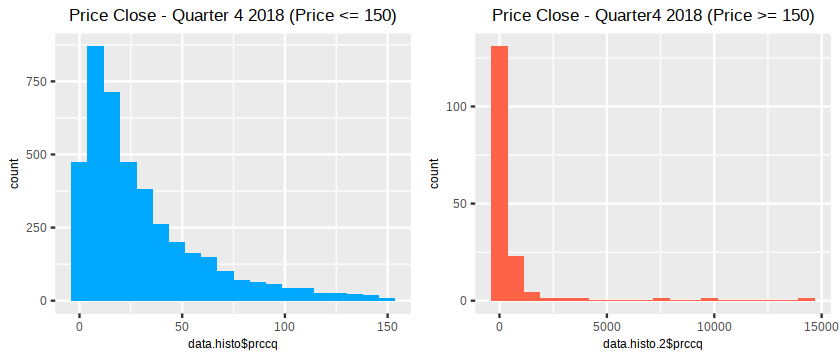

In [12]:
# Present some interesting data visualizations. 

data.histo = data.combo[!(data.combo$prccq >= 150),]

p1= ggplot(data.histo) + ggtitle("Price Close - Quarter 4 2018 (Price <= 150)") + geom_histogram(aes(x = data.histo$prccq), bins= 20)

data.histo.2 = data.combo[!(data.combo$prccq < 150),]

p2= ggplot(data.histo.2) + ggtitle("Price Close - Quarter4 2018 (Price >= 150)") + geom_histogram(aes(x = data.histo.2$prccq), bins= 20, fill=PALETTE[2])

grid.arrange(p1, p2, ncol = 2)

## New Representation of Data



### Variable Selection

In [13]:
# Select variables with at least 80% non-missing variables.
data.clean = data.combo[,(var_info.na_count(data.combo)/nrow(data.combo))<.20]

drops = c("prccq","growth","big_growth")
data.clean = data.clean[,!(names(data.clean) %in% drops)] #drops outcome variables
size(data.clean)

observations variables
1 4305         923

### Imputation

In [14]:
# Impute missing data.
# for each numeric variable, use the mean of non-missing values;
# for each non-numeric variable, use the mode of non-missing values.
ml = get_impute(data.clean)
data.imputed = put_impute(data.clean,ml)
head(data.imputed)

gvkey tic  conm                         datadate.q1 fyearq.q1 fqtr.q1 fyr.q1
1 1004  AIR  AAR CORP                     02/28/2017  2016      3        5    
2 1045  AAL  AMERICAN AIRLINES GROUP INC  03/31/2017  2017      1       12    
3 1050  CECE CECO ENVIRONMENTAL CORP      03/31/2017  2017      1       12    
4 1062  ASA  ASA GOLD AND PRECIOUS METALS 02/28/2017  2017      1       11    
5 1072  AVX  AVX CORP                     03/31/2017  2016      4        3    
6 1075  PNW  PINNACLE WEST CAPITAL CORP   03/31/2017  2017      1       12    
  indfmt.q1 consol.q1 popsrc.q1 datafmt.q1 cusip.q1  acctchgq.q1 acctstdq.q1
1 INDL      C         D         STD        000361105             DS         
2 INDL      C         D         STD        02376R102             DS         
3 INDL      C         D         STD        125141101             DS         
4 INDL      C         D         STD        G3156P103             DU         
5 INDL      C         D         STD        002444107             DS         
6 INDL      C         D         STD        723484101             DS         
  ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1 curncdq.q1 currtrq.q1
1 1        1                AZ         USD       USD        1         
2 1        1                AC         USD       USD        1         
3 1        1                           USD       USD        1         
4 1        1       GB                  USD       USD        1         
5 1        1                           USD       USD        1         
6 1        1                           USD       USD        1         
  datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1 rp.q1 scfq.q1  srcq.q1 staltq.q1
1 2017Q1      2016Q3      Y                 Q     7.000000 5                
2 2017Q1      2017Q1      Y                 Q     7.000000 5                
3 2017Q1      2017Q1      Y                 Q     7.000000 5                
4 2017Q1      2017Q1      Y                 Q     6.998605 3                
5 2017Q1      2016Q4      Y                 Q     7.000000 5                
6 2017Q1      2017Q1      Y                 Q     7.000000 5                
  updq.q1 apdedateq.q1 fdateq.q1  pdateq.q1  rdq.q1     acomincq.q1
1 3       02/28/2017   03/23/2017 03/21/2017 03/21/2017   -46.400  
2 3       03/31/2017   04/27/2017            04/27/2017 -5097.000  
3 3       03/31/2017   06/03/2017 05/14/2017 05/10/2017   -12.493  
4 3       02/28/2017   06/14/2017 04/06/2017                0.000  
5 3       03/31/2017   05/30/2017 04/28/2017 04/28/2017   -67.163  
6 3       03/31/2017   05/02/2017 05/02/2017 05/02/2017   -42.863  
  aociotherq.q1 aocisecglq.q1 aoq.q1   apq.q1   atq.q1    capsq.q1 ceqq.q1 
1    0          0              248.500  194.600  1502.100  457.300  885.700
2 -669          0             9710.000 1882.000 52627.000 6726.000 3457.000
3    0          0              255.093   50.454   482.304  246.259  189.362
4    0          0              262.747    0.220   265.887    1.373  264.856
5    0          0              401.058   80.441  2477.413  357.203 2216.479
6    0          0             2767.197  250.197 16192.825    0.000 4828.776
  cheq.q1  cibegniq.q1 cicurrq.q1 ciderglq.q1 cimiiq.q1 ciotherq.q1 cipenq.q1
1   10.100  13.700     -0.200     0.000       0.000     0             0.300  
2 7219.000 340.000      0.000     0.000       0.000     0           -14.000  
3   46.271   0.038      0.406     0.143       0.000     0             0.000  
4    3.081  21.626      0.000     0.000       0.000     0             0.000  
5 1107.382  33.857     11.689     2.109       0.000     0            -7.539  
6    3.028  28.185      0.000     0.437       4.873     0             0.522  
  ciq.q1  cisecglq.q1 citotalq.q1 cogsq.q1 csh12q.q1 cshfd12.q1 cshfdq.q1
1  13.800 0            13.800      340.700  33.9250   34.2750    34.200  
2 326.000 0           326.000     6774.000 526.7220  530.1763   507.797  
3   0.587 0             0.587       60.010  34.1068   34.3403    34.563  
4  21.626 0            2

### Principal Component Analysis

In [15]:
# Perform a principal component analysis.
nums = unlist(lapply(data.imputed, is.numeric)) # gets numerics only
data.PCA = data.imputed[,nums]

data.PCA=data.PCA[,!var_info.var(data.PCA) == 0] # gets variables with variance != 0

size(data.PCA)

PC = prcomp(data.PCA, scale=TRUE, retx=TRUE)
data.PC = as.data.frame(PC$x)
head(data.PC)

axis = names(data.PC[,1:20])
standard_deviation = var_info.sd(data.PC[,1:20])
variance = standard_deviation^2

scree = data.frame(axis, standard_deviation, variance)
scree

observations variables
1 4305         737

PC1         PC2        PC3        PC4        PC5        PC6        PC7       
1   3.4371231 -0.2260719  0.4220180 -0.6326422  1.5550509 -0.5650989  2.0762355
2 -12.0332067  0.8045109  5.9180179 -0.8018754  6.7210451 -3.0447560  0.3546613
3   3.9532234 -0.7553386  0.0754375 -0.3824019  1.4772691 -1.6295762  1.7417282
4   3.6561434 -0.7981915 -0.5747387 -0.9472515 -1.0964242  0.3917829 -0.9167008
5   2.9282228 -0.7104200 -0.1640085 -0.5317080 -0.3809744  2.0787585 -0.2194266
6   0.3488491  1.1389605  0.3578312 -0.4864851 -1.4258804  0.6473941 -1.6268031
  PC8        PC9         PC10        PC11       PC12       PC13      
1 -4.7809366  2.57837534  1.08343819 -1.0852790 -0.7351277  0.2918953
2 -0.9115091 -0.08658059 -3.11308754 -2.0981728 -0.6351669  2.3283523
3 -4.0193246 -0.40386946 -0.43740189  0.2450501  0.2815124 -0.2882787
4  1.8407762 -0.09133025  0.17936600 -0.5735521  0.7219205  0.2614258
5  0.5828688  2.75599993  1.80042773 -1.4246807 -0.5199072  0.6314484
6  4.3147377 -0.63028018  0.02072026 -0.2936045  0.5269396  0.2559957
  PC14       PC15       PC16       PC17       PC18       PC19       
1  6.8480433 -1.3871612  1.1200720  0.2210991  0.9914828 -0.79834108
2 -1.9116502  0.3221275  0.7248502 -0.7006368  0.6671353 -0.97108690
3 -1.2873906 -0.2362659  0.2034695 -0.2576521  0.1375479  0.09761457
4 -0.6286022 -0.2533000 -0.1233606  0.4316422 -0.2438496 -0.61143074
5  7.4178654 -0.6216722  0.9347407  0.6342238  0.9928027 -0.50677861
6 -1.1217805 -0.0223046  0.7377696  0.8076057  0.9825753 -0.03070531
  PC20        PC21        PC22      PC23        PC24       PC25       
1  0.20001133 -0.31771792 1.0539380  1.67813281 -0.8672219 -0.37905631
2  0.17976843 -1.29237646 1.3577810  0.94279445  1.0363612  0.75825338
3 -0.01354828 -0.33991383 0.2494386  0.61549945  0.2483715  0.31180484
4  0.42921625 -0.01092949 1.3929427 -0.09686668 -0.4272915 -0.05712958
5  0.99580119  0.30899020 1.1748072  1.19231513 -2.6594114 -0.62123824
6  2.15072710  0.82606477 1.5094747  0.80834093 -3.6872727 -0.94828374
  PC26        PC27       PC28       PC29       PC30       PC31       PC32      
1 -1.16129629  1.0867702 -1.0412642  0.8547673 -0.1336883 -0.9056983  0.2780267
2 -0.11103292  0.9812441 -0.6843918  0.7208754  2.6043514 -0.6555264  3.3345707
3  0.08131449 -0.3949381  0.2621053 -0.5860781  0.9672057 -1.3418068  0.3751708
4 -0.18191507  1.0705043 -0.3281404  1.0495254 -0.6447604  0.3092847 -0.2634550
5  0.21320871 -0.6228058 -0.9418865 -0.5638329  0.5259058 -0.8018813 -0.6139924
6  1.34444342 -2.8374420 -0.8613145 -2.7696178  1.8756656 -2.0570613  0.4709724
  PC33        PC34         PC35       PC36       PC37        PC38       
1 -0.72462144 -0.018625133 -1.0475663 0.37038314  0.09388485  1.00864500
2  0.06006156 -2.032854440  0.1068628 1.35051571 -0.82325819  0.46516991
3 -0.60379852  0.099462658 -0.1211193 0.52728669 -0.61756994  1.31721777
4 -0.01441784 -0.009774794 -0.3777850 0.03077777 -0.05361038  0.04329721
5 -0.50866400  0.127512527  0.2144432 0.31598395 -0.01592418 -0.05828582
6 -0.37456172 -0.369541993  0.3872488 0.57812468  0.65333253  0.54816070
  PC39       PC40        PC41        PC42        PC43       PC44      
1 -0.6290530  0.56007039 -0.13098834  0.52265832 -1.7038187  2.7211571
2  1.0660042 -0.69623790 -0.09713277 -0.63579594 -1.1964207  4.5067491
3 -0.7113846  0.88648348  0.02536412 -0.28329422 -2.1338699  2.3966200
4  0.1028666  0.05136492 -0.26382082  0.92915422 -0.1309160  0.2109205
5 -0.3964813 -0.66574347  0.16458404 -0.08980529  0.3523539 -0.6987686
6 -0.4857411 -0.89770552  0.58870642 -1.47209306 -0.6020450 -0.4214584
  PC45        PC46         PC47        PC48        PC49        PC50       
1 -0.34390112  0.227859079 -0.09971139 -0.57797892 -0.29036026  0.21928328
2 -0.97925113  1.070410962 -0.42814534 -2.33088693 -2.10762751 -0.92047411
3 -0.64697536  0.376578172 -0.13601367  0.05854781 -0.64890190  0.59092189
4 -0.03557058  0.023649571 -0.04186500  0.42966210 -0.30548507 -0.02502204
5  0.52948736  0.183470287  0

axis standard_deviation variance  
PC1  PC1  12.820664          164.369435
PC2  PC2   7.361713           54.194814
PC3  PC3   6.404044           41.011783
PC4  PC4   5.011855           25.118686
PC5  PC5   4.515024           20.385444
PC6  PC6   4.461475           19.904760
PC7  PC7   4.170973           17.397014
PC8  PC8   4.108424           16.879151
PC9  PC9   3.946199           15.572488
PC10 PC10  3.707323           13.744244
PC11 PC11  3.551858           12.615693
PC12 PC12  3.454414           11.932977
PC13 PC13  3.365664           11.327695
PC14 PC14  3.227522           10.416899
PC15 PC15  3.113119            9.691510
PC16 PC16  3.011991            9.072091
PC17 PC17  2.928837            8.578086
PC18 PC18  2.862011            8.191108
PC19 PC19  2.850678            8.126364
PC20 PC20  2.797951            7.828527

### Cluster Analysis

In [16]:
# Perform a cluster analysis.


data.CA = data.imputed[,c("incorp.q4","state.q4")]
data.d = dummify(data.CA)
size(data.d)
head(data.d)


set.seed(12345)
clusters = 4

data.d$cluster = kmeans(data.d, clusters, nstart=1)$cluster
# head(data.d)
total = nrow(data.d)

data.d1 = nrow(data.d[(data.d$cluster == 1),])/total
data.d2 = nrow(data.d[(data.d$cluster == 2),])/total
data.d3 = nrow(data.d[(data.d$cluster == 3),])/total
data.d4 = nrow(data.d[(data.d$cluster == 4),])/total

frequency = data.frame(cluster = c(1,2,3,4),
                      frequency = c(data.d1,data.d2,data.d3,data.d4))

frequency

observations variables
1 4305         115

incorp.q4DE incorp.q4 incorp.q4AZ incorp.q4GA incorp.q4IL incorp.q4NY
1 1           0         0           0           0           0          
2 1           0         0           0           0           0          
3 1           0         0           0           0           0          
4 0           1         0           0           0           0          
5 1           0         0           0           0           0          
6 0           0         1           0           0           0          
  incorp.q4CT incorp.q4NV incorp.q4HI incorp.q4FL incorp.q4TX incorp.q4PA
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0          
  incorp.q4OK incorp.q4MA incorp.q4OH incorp.q4MN incorp.q4CA incorp.q4WI
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0          
  incorp.q4RI incorp.q4MD incorp.q4IN incorp.q4PR incorp.q4VA incorp.q4NJ
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0          
  incorp.q4SD incorp.q4MO incorp.q4IA incorp.q4LA incorp.q4KY incorp.q4WA
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0          
  incorp.q4MI incorp.q4TN incorp.q4NC incorp.q4MS incorp.q4CO incorp.q4AR
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0          
  incorp.q4ID incorp.q4KS incorp.q4UT incorp.q4OR incorp.q4NM incorp.q4SC
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0           0           0           0           0          
6 0           0           0           0           0           0          
  incorp.q4NH incorp.q4NE incorp.q4DC incorp.q4ME incorp.q4VI incorp.q4WV
1 0           0           0           0           0           0          
2 0           0           0           0           0           0          
3 0           0           0           0           0           0          
4 0           0           0           0           0           0          
5 0           0     

cluster frequency 
1 1       0.46782811
2 2       0.02624855
3 3       0.38420441
4 4       0.12171893

### Transform the Data

In [17]:
# Change the representation of the data.

# data.variance = data.frame(var_info.var(data.imputed))
# names(data.variance)[1] = "Variance"
# data.variance

#naics.q3, sic.q3, atq.q4, apq.q4, naics.q4


data.trans = cbind(data.combo[,1:3],data.PC[,1:5]) #adds on PC1-5
data.trans = cbind(data.trans,data.combo[,2712:2714]) #adds outcome variables

size(data.trans)

outcome.variables = data.frame(Outcome.Variables = c(ifelse(colnames(data.trans)=="big_growth", 1, 0)))
pred.variables = data.frame(Predictor.Variables = c(ifelse(colnames(data.trans)!="big_growth", 1, 0)))
pred.grow.variables = data.frame(Count = c(colSums(outcome.variables), colSums(pred.variables)))
pred.grow.variables

head(data.trans)



observations variables
1 4305         11

Count
Outcome.Variables    1   
Predictor.Variables 10

gvkey tic  conm                         PC1         PC2        PC3       
1 1004  AIR  AAR CORP                       3.4371231 -0.2260719  0.4220180
2 1045  AAL  AMERICAN AIRLINES GROUP INC  -12.0332067  0.8045109  5.9180179
3 1050  CECE CECO ENVIRONMENTAL CORP        3.9532234 -0.7553386  0.0754375
4 1062  ASA  ASA GOLD AND PRECIOUS METALS   3.6561434 -0.7981915 -0.5747387
5 1072  AVX  AVX CORP                       2.9282228 -0.7104200 -0.1640085
6 1075  PNW  PINNACLE WEST CAPITAL CORP     0.3488491  1.1389605  0.3578312
  PC4        PC5        prccq growth        big_growth
1 -0.6326422  1.5550509 43.69  0.0507455507 False     
2 -0.8018754  6.7210451 32.11 -0.3828560446 False     
3 -0.3824019  1.4772691  6.75  0.3157894737 True      
4 -0.9472515 -1.0964242  8.66 -0.2164739518 False     
5 -0.5317080 -0.3809744 15.25 -0.1184971098 False     
6 -0.4864851 -1.4258804 85.20  0.0002347969 False

## Model for Prediction

### Investment Criteria

I transformed the data in PCA and will build a model using 2 columns of PCA as my base. I'll see how well the model performs and then do some tuning to create a model with better results. I have chosen to use the decision tree method because the Neural Network and Support Vector Machine was taking too long to run at the moment.

### Build Model

In [18]:
# Construct a model to predict growth or big_growth.
# Present a brief summary of the model parameters.
model = rpart(big_growth ~ PC1 + PC2, data.trans, method="class", minsplit=2, cp=0, maxdepth=30)


### In-Sample Estimated Performance

In [19]:
# Present the model's in-sample estimated profit and profit rate.
datax.trans = data.trans[,1:10]
cutoff = 0.5

prob = predict(model, datax.trans, type="prob")
prediction = as.class(prob, class="False", cutoff) # based on probability that exceeds cutoff
insample.pred = cbind(data.trans,prediction)
# head(insample.pred)

CM = confusionMatrix(prediction, data.trans$big_growth)$table
cm = CM/sum(CM)
fmt.cm(cm)

insample_accuracy = (cm[1,1] + cm[2,2])/sum(cm)
fmt(insample_accuracy)

insample.stocks = insample.pred[insample.pred$prediction == "True",]
insample.stocks = insample.stocks[order(insample.stocks$gvkey),]
insample.stocks = insample.stocks[1:12,]
# insample.stocks


revenue = list()
profit = 0
for (q in 1:12)
    {
    revenue[[q]] = Budget/12 * (insample.stocks[q,10])
    profit = profit + revenue[[q]]
}

# profit
profit_rate = profit/Budget
fmt(profit)
fmt(profit_rate)

cm 
 
 
 
 False 
 True 
 
 
 
 
 False 
 0.9159117 
 0.0004646 
 
 
 True 
 0.0004646 
 0.0831591

insample_accuracy 
 
 
 
 
 0.9990708

profit 
 
 
 
 
 430983.7

profit_rate 
 
 
 
 
 0.4309837

### Out-of-Sample Estimated Performance

In [20]:
# Partition the data into training and validation.
set.seed(12345)

holdout = sample(1:nrow(data.trans), 0.75*nrow(data.trans))
holdin = setdiff(1:nrow(data.trans), holdout)
data.train = data.trans[holdout,]
data.test  = data.trans[holdin,]
size(data.train)
size(data.test)

observations variables
1 3228         11

observations variables
1 1077         11

In [46]:
# Present the model's out-of-sample estimated profit and profit rate.

model.OS = model = rpart(big_growth ~ PC1 + PC2, data.train, method="class", minsplit=2, cp=0, maxdepth=30)

datax.test = data.test[,1:10]

cutoff = 0.5

prob = predict(model.OS, datax.test, type="prob")
prediction = as.class(prob, class="False", cutoff) # based on probability that exceeds cutoff
outsample.pred = cbind(data.test,prediction)

CM = confusionMatrix(prediction, data.test$big_growth)$table
cm = CM/sum(CM)
fmt.cm(cm)

outsample_accuracy = (cm[1,1] + cm[2,2])/sum(cm)
fmt(outsample_accuracy)

outsample.stocks = outsample.pred[outsample.pred$prediction == "True",]
outsample.stocks = outsample.stocks[order(outsample.stocks$gvkey),]
outsample.stocks = outsample.stocks[1:12,]
# outsample.stocks
revenue = list()
profit = 0
for (q in 1:12)
    {
    revenue[[q]] = Budget/12 * (outsample.stocks[q,10])
    profit = profit + revenue[[q]]
}

# profit
profit_rate = profit/Budget
fmt(profit)
fmt(profit_rate)

cm 
 
 
 
 False 
 True 
 
 
 
 
 False 
 0.8532962 
 0.0761374 
 
 
 True 
 0.0594243 
 0.0111421

outsample_accuracy 
 
 
 
 
 0.8644383

profit 
 
 
 
 
 -232624.1

profit_rate 
 
 
 
 
 -0.2326241

### 5-Fold Cross-Validation Estimated Performance

In [47]:
# Partition the data into 5 folds.
set.seed(12345)
nfold = 5
fold = createFolds(data.trans$big_growth, k = nfold)
fmt(head(fold$Fold1), "Fold 1")
fmt(head(fold$Fold2), "Fold 2")
fmt(head(fold$Fold3), "Fold 3")
fmt(head(fold$Fold4), "Fold 4")
fmt(head(fold$Fold5), "Fold 5")

Fold 1 
 
 
 
 
 4 
 
 
 7 
 
 
 8 
 
 
 9 
 
 
 12 
 
 
 13

Fold 2 
 
 
 
 
 10 
 
 
 23 
 
 
 31 
 
 
 40 
 
 
 54 
 
 
 55

Fold 3 
 
 
 
 
 18 
 
 
 19 
 
 
 22 
 
 
 25 
 
 
 26 
 
 
 28

Fold 4 
 
 
 
 
 1 
 
 
 3 
 
 
 5 
 
 
 6 
 
 
 16 
 
 
 29

Fold 5 
 
 
 
 
 2 
 
 
 11 
 
 
 14 
 
 
 15 
 
 
 17 
 
 
 27

In [78]:
# Present the model's fold 1:5 estimated profit.

data.train = list()
data.test = list()
profit_list = list()
profit_rate_list = list()
nfold = 5 

for (i in 1:nfold) {data.train[[i]] = data.trans[setdiff(1:nrow(data.trans), fold[[i]]),]
                     data.test[[i]]  = data.trans[fold[[i]],]}

# A Confusion Matrix for Each Fold
cm = list()
for (i in 1:nfold) { set.seed(12345)
                    model = rpart(big_growth ~ PC1 + PC2, data.train[[i]], method="class", minsplit=2, cp=0, maxdepth=30)
                    prob = predict(model, data.test[[i]], type="prob")
                    prediction = as.class(prob, class="False", cutoff) # based on probability that exceeds cutoff
                    fold.pred = cbind(data.test[[i]],prediction) 
                    CM = confusionMatrix(prediction, data.test[[i]]$big_growth)$table
                     cm[[i]] = CM/sum(CM)
                    
                    
fold.stocks = fold.pred[fold.pred$prediction == "True",]
fold.stocks = fold.stocks[order(fold.stocks$gvkey),]
fold.stocks = fold.stocks[1:12,]

revenue = list()
profit = 0
for (q in 1:12)
    {
    revenue[[q]] = Budget/12 * (fold.stocks[q,10])
    profit = profit + revenue[[q]]
}

# profit
profit_rate = profit/Budget
fmt(profit, paste("Profit", i))
fmt(profit_rate, paste("Profit_Rate", i))
profit_list[[i]] = profit
profit_rate_list[[i]] = profit_rate
                   }

# A Performance Measurement for Each Fold 
accuracy = list()
for (i in 1:nfold) { accuracy[[i]] = cm[[i]][1,1]+cm[[i]][2,2] }

# A Performance Measurement for the Model
cv_accuracy = mean(unlist(accuracy))
fmt(cv_accuracy)



Profit 1 
 
 
 
 
 -256061.3

Profit_Rate 1 
 
 
 
 
 -0.2560613

Profit 2 
 
 
 
 
 45712.28

Profit_Rate 2 
 
 
 
 
 0.0457123

Profit 3 
 
 
 
 
 -10212.58

Profit_Rate 3 
 
 
 
 
 -0.0102126

Profit 4 
 
 
 
 
 20633.76

Profit_Rate 4 
 
 
 
 
 0.0206338

Profit 5 
 
 
 
 
 -90074.43

Profit_Rate 5 
 
 
 
 
 -0.0900744

cv_accuracy 
 
 
 
 
 0.8504065

In [86]:
# Present the model's 5-fold cross-validation estimated profit and profit rate.

# model_profit = list()
# model_profit_rate = list()
model_profit = 0
model_profit_rate = 0
for (i in 1:5)
    {
    model_profit = model_profit + profit_list[[i]]
    model_profit_rate = model_profit_rate + profit_rate_list[[i]]
    
}
fmt(model_profit)
fmt(model_profit_rate)

model_profit 
 
 
 
 
 -290002.3

model_profit_rate 
 
 
 
 
 -0.2900023

## Tune Model

Some factors I wanted tune my model in was the cutoff and the different variables. I had included 5 columns of PCA, plus the closing price for the most recent quarter that the model could train on.

In [114]:
tune = data.frame()
# head(data.trans)
for (f in exhaustive(names(data.trans[4:9]), keep = "big_growth"))
    {
    
    
    tune = rbind(tune, data.frame(variables=paste(f, collapse=", ")))
    
    
}

tune

variables                                 
1  PC1, big_growth                           
2  PC1, PC2, big_growth                      
3  PC1, PC2, PC3, big_growth                 
4  PC1, PC2, PC3, PC4, big_growth            
5  PC1, PC2, PC3, PC4, PC5, big_growth       
6  PC1, PC2, PC3, PC4, PC5, prccq, big_growth
7  PC2, big_growth                           
8  PC2, PC3, big_growth                      
9  PC2, PC3, PC4, big_growth                 
10 PC2, PC3, PC4, PC5, big_growth            
11 PC2, PC3, PC4, PC5, prccq, big_growth     
12 PC3, big_growth                           
13 PC3, PC4, big_growth                      
14 PC3, PC4, PC5, big_growth                 
15 PC3, PC4, PC5, prccq, big_growth          
16 PC4, big_growth                           
17 PC4, PC5, big_growth                      
18 PC4, PC5, prccq, big_growth               
19 PC5, big_growth                           
20 PC5, prccq, big_growth                    
21 prccq, big_growth

In [115]:
# Show some of the work you did to build and tune resulting in your best model.
data.train = list()
data.test = list()
profit_list = list()
profit_rate_list = list()
tune = data.frame()
nfold = 5 

for (i in 1:nfold) {data.train[[i]] = data.trans[setdiff(1:nrow(data.trans), fold[[i]]),]
                     data.test[[i]]  = data.trans[fold[[i]],]}

# A Confusion Matrix for Each Fold
cm = list()
for (f in exhaustive(names(data.trans[4:9]), keep = "big_growth"))
for (n in c(0.25, 0.50, 0.75, 1))  # try several values for cut-off
{ 
    for (i in 1:nfold) { set.seed(12345)
                    model = rpart(big_growth ~ ., data.train[[i]][,f], method="class", minsplit=2, cp=0, maxdepth=30)
                    prob = predict(model, data.test[[i]], type="prob")
                    prediction = as.class(prob, class="False", cutoff = n) # based on probability that exceeds cutoff
                    fold.pred = cbind(data.test[[i]],prediction) 
                    CM = confusionMatrix(prediction, data.test[[i]]$big_growth)$table
                     cm[[i]] = CM/sum(CM)
                        
                        fold.stocks = fold.pred[fold.pred$prediction == "True",]
                        fold.stocks = fold.stocks[order(fold.stocks$gvkey),]
                        fold.stocks = fold.stocks[1:12,]

                        revenue = list()
                        profit = 0
                        for (q in 1:12)
                            {
                                revenue[[q]] = Budget/12 * (fold.stocks[q,10])
                                profit = profit + revenue[[q]]
                            }
                        
                        # profit
                        profit_rate = profit/Budget
#                         fmt(profit, paste("Profit", i))
#                         fmt(profit_rate, paste("Profit_Rate", i))
                        profit_list[[i]] = profit
                        profit_rate_list[[i]] = profit_rate

                    
                    }
    # Profit for each fold
    model_profit = 0
    model_profit_rate = 0
    for (j in 1:5)
        {
        model_profit = model_profit + profit_list[[j]]
        model_profit_rate = model_profit_rate + profit_rate_list[[j]]

    }
 # A Performance Measurement for Each Fold 
    accuracy = list()
    for (i in 1:nfold) { accuracy[[i]] = cm[[i]][1,1]+cm[[i]][2,2] }

    # A Performance Measurement for the Model
    cv_accuracy = mean(unlist(accuracy))
     
    # Gather Results
    tune = rbind(tune, data.frame(method="Decision Tree", variables=paste(f, collapse=", "), cutoff=n, cv_accuracy, model_profit))  


}
tune






method        variables                                  cutoff cv_accuracy
1  Decision Tree PC1, big_growth                            0.25   0.8529617  
2  Decision Tree PC1, big_growth                            0.50   0.8522648  
3  Decision Tree PC1, big_growth                            0.75   0.8520325  
4  Decision Tree PC1, big_growth                            1.00   0.7927991  
5  Decision Tree PC1, PC2, big_growth                       0.25   0.8508711  
6  Decision Tree PC1, PC2, big_growth                       0.50   0.8504065  
7  Decision Tree PC1, PC2, big_growth                       0.75   0.8504065  
8  Decision Tree PC1, PC2, big_growth                       1.00   0.8434379  
9  Decision Tree PC1, PC2, PC3, big_growth                  0.25   0.8394890  
10 Decision Tree PC1, PC2, PC3, big_growth                  0.50   0.8397213  
11 Decision Tree PC1, PC2, PC3, big_growth                  0.75   0.8397213  
12 Decision Tree PC1, PC2, PC3, big_growth                  1.00   0.8397213  
13 Decision Tree PC1, PC2, PC3, PC4, big_growth             0.25   0.8476190  
14 Decision Tree PC1, PC2, PC3, PC4, big_growth             0.50   0.8476190  
15 Decision Tree PC1, PC2, PC3, PC4, big_growth             0.75   0.8476190  
16 Decision Tree PC1, PC2, PC3, PC4, big_growth             1.00   0.8448316  
17 Decision Tree PC1, PC2, PC3, PC4, PC5, big_growth        0.25   0.8527294  
18 Decision Tree PC1, PC2, PC3, PC4, PC5, big_growth        0.50   0.8527294  
19 Decision Tree PC1, PC2, PC3, PC4, PC5, big_growth        0.75   0.8527294  
20 Decision Tree PC1, PC2, PC3, PC4, PC5, big_growth        1.00   0.8511034  
21 Decision Tree PC1, PC2, PC3, PC4, PC5, prccq, big_growth 0.25   0.8743322  
22 Decision Tree PC1, PC2, PC3, PC4, PC5, prccq, big_growth 0.50   0.8743322  
23 Decision Tree PC1, PC2, PC3, PC4, PC5, prccq, big_growth 0.75   0.8743322  
24 Decision Tree PC1, PC2, PC3, PC4, PC5, prccq, big_growth 1.00   0.8743322  
25 Decision Tree PC2, big_growth                            0.25   0.8583043  
26 Decision Tree PC2, big_growth                            0.50   0.8583043  
27 Decision Tree PC2, big_growth                            0.75   0.8583043  
28 Decision Tree PC2, big_growth                            1.00   0.7554007  
29 Decision Tree PC2, PC3, big_growth                       0.25   0.8473868  
30 Decision Tree PC2, PC3, big_growth                       0.50   0.8473868  
31 Decision Tree PC2, PC3, big_growth                       0.75   0.8473868  
32 Decision Tree PC2, PC3, big_growth                       1.00   0.8473868  
33 Decision Tree PC2, PC3, PC4, big_growth                  0.25   0.8515679  
34 Decision Tree PC2, PC3, PC4, big_growth                  0.50   0.8515679  
35 Decision Tree PC2, PC3, PC4, big_growth                  0.75   0.8515679  
36 Decision Tree PC2, PC3, PC4, big_growth                  1.00   0.8515679  
37 Decision Tree PC2, PC3, PC4, PC5, big_growth             0.25   0.8483159  
38 Decision Tree PC2, PC3, PC4, PC5, big_growth             0.50   0.8483159  
39 Decision Tree PC2, PC3, PC4, PC5, big_growth             0.75   0.8483159  
40 Decision Tree PC2, PC3, PC4, PC5, big_growth             1.00   0.8483159  
41 Decision Tree PC2, PC3, PC4, PC5, prccq, big_growth      0.25   0.8650407  
42 Decision Tree PC2, PC3, PC4, PC5, prccq, big_growth      0.50   0.8650407  
43 Decision Tree PC2, PC3, PC4, PC5, prccq, big_growth      0.75   0.8650407  
44 Decision Tree PC2, PC3, PC4, PC5, prccq, big_growth      1.00   0.8650407  
45 Decision Tree PC3, big_growth                            0.25   0.8557491  
46 Decision Tree PC3, big_growth                            0.50   0.8555168  
47 Decision Tree PC3, big_growth                            0.75   0.8550523  
48 Decision Tree PC3, big_growth                            1.00   0.8229965  
49 Decision Tree PC3, PC4, big_growth                       0.25   0.8492451  
50 Decision Tree PC3, PC4, big_growth                

In [122]:
# I decided on this model because it had a good CV accuracy rating and was the most profitable.
# It includes PCA1:5 and the previous close of the quarter.
model.best = rpart(big_growth ~ ., data.trans[4:10], method="class", minsplit=2, cp=0, maxdepth=30)


## Deploy Model

### Retrieve Investment Opportunities

In [116]:
data.opportunities = read.csv("Investment Opportunities.csv", header=TRUE)
size(data.opportunities)
data.opportunities[1:6,]


observations variables
1 230          3

gvkey  tic   conm                        
1   1004 AIR   AAR CORP                    
2  10549 THO   THOR INDUSTRIES INC         
3 106133 DSU   BLACKROCK DEBT STRATEGIES FD
4  10618 TTC   TORO CO                     
5  11178 VLGEA VILLAGE SUPER MARKET  -CL A 
6 111873 RH    RH

### Selected Data for 2018

#### Retrieve Raw Test Data

In [117]:
# Retrieve the 2018 data (or use the 2018 data retrieved earlier).
# Filter the data to include only companies listed as investment opportunities.

data.invest = data.combo[data.combo$tic %in% data.opportunities$tic,]
size(data.invest)

observations variables
1 196          2714

#### Partition Data by Calendar Quarter 

To partition the dataset by calendar quarter in which information is reported, first add a synthetic variable to indicate such.  Then partition into four new datasets, one for each quarter, and drop the quarter variables. Additionally, filter the observations to include only those with non-missing `prccq`.  Then remove any observations about companies that reported more than once per quarter.  Then change all the variable names (except for the `gvkey`, `tic`, and `conm` variables) by suffixing them with quarter information - e.g., in the Quarter 1 dataset, `prccq` becomes `prccq.q1`, etc.

In [118]:
# Partition the dataset as described.

head(data.invest)

gvkey tic   conm                     datadate.q1 fyearq.q1 fqtr.q1 fyr.q1
1  1004  AIR   AAR CORP                 02/28/2017  2016      3        5    
30 1410  ABM   ABM INDUSTRIES INC       01/31/2017  2017      1       10    
39 1562  AMSWA AMERICAN SOFTWARE  -CL A 01/31/2017  2016      3        4    
44 1618  AXR   AMREP CORP               01/31/2017  2016      3        4    
45 1632  ADI   ANALOG DEVICES           01/31/2017  2017      1       10    
49 1686  APOG  APOGEE ENTERPRISES INC   02/28/2017  2016      4        2    
   indfmt.q1 consol.q1 popsrc.q1 datafmt.q1 cusip.q1  acctchgq.q1 acctstdq.q1
1  INDL      C         D         STD        000361105             DS         
30 INDL      C         D         STD        000957100             DS         
39 INDL      C         D         STD        029683109             DS         
44 INDL      C         D         STD        032159105             DS         
45 INDL      C         D         STD        032654105             DS         
49 INDL      C         D         STD        037598109             DS         
   adrrq.q1 ajexq.q1 ajpq.q1 bsprq.q1 compstq.q1 curcdq.q1 curncdq.q1
1  NA       1        1                AZ         USD       USD       
30 NA       1        1                           USD       USD       
39 NA       1        1                           USD       USD       
44 NA       1        1       GB                  USD       USD       
45 NA       1        1                           USD       USD       
49 NA       1        1                           USD       USD       
   currtrq.q1 curuscnq.q1 datacqtr.q1 datafqtr.q1 finalq.q1 ogmq.q1 rp.q1
1  1          NA          2017Q1      2016Q3      Y                 Q    
30 1          NA          2016Q4      2017Q1      Y                 Q    
39 1          NA          2016Q4      2016Q3      Y                 Q    
44 1          NA          2016Q4      2016Q3      Y                 Q    
45 1          NA          2016Q4      2017Q1      Y                 Q    
49 1          NA          2017Q1      2016Q4      Y                 Q    
   scfq.q1 srcq.q1 staltq.q1 updq.q1 apdedateq.q1 fdateq.q1  pdateq.q1 
1  7       5                 3       02/28/2017   03/23/2017 03/21/2017
30 7       5                 3       01/31/2017   03/13/2017 03/07/2017
39 7       5                 3       01/31/2017   03/03/2017 02/24/2017
44 7       5                 3       01/31/2017   03/16/2017           
45 7       5                 3       01/28/2017   02/17/2017 02/15/2017
49 7       5                 3       03/04/2017   05/03/2017 04/13/2017
   rdq.q1     acchgq.q1 acomincq.q1 acoq.q1 actq.q1  altoq.q1 ancq.q1  anoq.q1
1  03/21/2017 0         -46.400      28.000  893.100  90.500   609.000 NA     
30 03/07/2017 0         -26.700     161.000 1059.500 235.800  1352.400  0     
39 02/23/2017 0           0.000       4.394   98.345   0.826    38.628  0     
44 03/15/2017 0         -11.101       1.953       NA  11.581        NA NA     
45 02/15/2017 0         -76.293      78.570 7233.733 110.808  2969.638  0     
49 04/13/2017 0         -31.090       8.724  297.461  24.494   487.197  0     
   aociderglq.q1 aociotherq.q1 aocipenq.q1 aocisecglq.q1 aol2q.q1 aoq.q1  
1    0.000        0.0          -42.500     0                   NA  248.500
30   1.700       -2.2               NA     0                2.800 1264.900
39   0.000        0.0            0.000     0               14.949   35.307
44   0.000        0.0          -11.101     0                   NA   21.296
45 -16.799        0.0          -31.207     0             3546.799 2340.714
49   0.000        0.0           -3.628     0               15.089  240.449
   apq.q1  aqaq.q1 aqdq.q1 aqepsq.q1 aqpl1q.q1 aqpq.q1 arcedq.q1 arceepsq.q1
1  194.600     NA     NA      NA           NA      NA  NA        NA         
30 187.300 -0.325  -0.01   -0.01        4.900  -0.500  NA        NA         
39   1.263  0.000   0.00    0.00       60.369   0.000  NA        NA         
44   0.530     NA   

#### Consolidate Data by Company

Consolidate the four quarter datasets into one dataset, with one observation per company that includes variables for all four quarters.  Remove any observations with missing `prccq.q4` values.

In [137]:
# Consolidate the partitions as described.
size(data.invest)


observations variables
1 196          2714

### New Representation of Test Data

In [138]:
# Change the representation of the test data appropriately.
data.invest.clean = data.invest[,colnames(data.clean)]
# size(data.invest.clean)

data.invest.imputed = put_impute(data.invest.clean,ml)
# size(data.invest.imputed)
# head(data.invest.imputed)

nums = unlist(lapply(data.invest.imputed, is.numeric)) # gets numerics only
data.invest.PCA = data.invest.imputed[,nums]

data.invest.PCA=data.invest.PCA[,!var_info.var(data.invest.PCA) == 0] # gets variables with variance != 0

# size(data.invest.PCA)

new.pc = as.data.frame(predict(PC, data.invest.PCA))
head(new.pc)

data_invest = cbind(data.invest.imputed[,1:3],new.pc[,1:5], data.invest[,2712:2714])

size(data_invest)
head(data_invest)

PC1       PC2        PC3        PC4        PC5        PC6        PC7       
1  3.437123 -0.2260719  0.4220180 -0.6326422  1.5550509 -0.5650989  2.0762355
2  3.125662 -0.1716232  0.2009771 -0.3167408  0.8702400 -1.6638975  1.1649022
3  3.968875 -0.6407870 -0.5521866 -0.9302040 -1.6277133  2.1336483 -0.6552439
4  4.037274 -0.7746470  0.3079135 -0.6597852  1.4400831 -0.3932217  2.1569433
5 -3.178402  0.2797037  0.2056212 -2.3606704  0.6521214  1.5117201 -0.9611092
6  3.485215  0.1919311  0.5369658 -0.4768544  1.6483509 -0.3305254  2.3844285
  PC8       PC9        PC10      PC11       PC12        PC13      PC14      
1 -4.780937  2.5783753 1.0834382 -1.0852790 -0.73512767 0.2918953  6.8480433
2 -2.583567  0.1618981 0.2705456 -0.6819994  0.02748275 0.3386295 -0.2747674
3  1.840672  2.9567737 1.5217937 -1.5459296 -0.98433658 0.5312080  8.0680355
4 -4.984091  2.8842215 1.2164210 -0.9242734 -0.75775068 0.2790111  7.6015436
5  3.086267 -3.3832074 1.1039296  0.3612814  0.41801458 0.7925416  2.1496644
6 -5.469613  3.3107621 1.2630660 -0.6972618 -1.20431140 0.4519499  7.8073199
  PC15       PC16       PC17       PC18       PC19       PC20      
1 -1.3871612  1.1200720  0.2210991  0.9914828 -0.7983411  0.2000113
2 -1.0639500  0.5270591  0.2241317 -0.7186129 -0.3307328 -0.5195392
3 -0.4445296  0.8130236  0.7474219  0.9707567 -0.6478129  0.5948287
4 -1.4188517  1.0679684  0.2597965  1.2455130 -0.7753236  0.3627890
5 -5.1989534 -0.6075224 -5.0352773  0.3707732 -0.4259517 -1.5083382
6 -1.1026961  1.1034631  0.1164769  1.3839833 -0.3511585  0.2592237
  PC21           PC22        PC23      PC24       PC25       PC26      
1 -0.31771792460  1.05393804 1.6781328 -0.8672219 -0.3790563 -1.1612963
2 -0.78118111621  1.21320218 0.1869017  0.7514281  0.5511316 -0.8925055
3 -0.04676655082  0.33726352 1.6727298 -0.6116006 -0.3720513 -1.3170646
4 -0.17737197375  1.07077775 1.8707669 -1.1469593 -0.6174928 -1.1325449
5 -1.86832645241  0.50668844 0.4708157 -0.2192141 -4.0866858 -0.8126930
6  0.00001822057 -0.09939496 1.6215268 -0.5773348 -0.5891015 -0.7842099
  PC27      PC28       PC29          PC30       PC31       PC32       
1  1.086770 -1.0412642  0.8547673413 -0.1336883 -0.9056983  0.27802668
2  2.288290 -0.4325511  2.0066876516 -0.6303308  0.7926570  0.79915047
3  0.940412 -0.7643104  0.9955312808 -0.3050320 -0.8312761  0.17418650
4  0.804983 -1.0596318  0.6199488660  0.1144391 -1.0933565  0.01505778
5 -6.052434 -0.7883808 -0.0194422680  4.5114416 -0.8916802 -0.96257279
6  0.025829 -0.5428712  0.0007889412  0.7580011 -1.2711663  0.26462298
  PC33       PC34        PC35       PC36       PC37        PC38      
1 -0.7246214 -0.01862513 -1.0475663  0.3703831  0.09388485  1.0086450
2 -0.4250994  0.28481029 -1.1980489 -0.4541364 -0.28789499  0.2433869
3 -0.3208346  0.17823863 -0.6975701  0.5187298  0.44243736  0.2790841
4 -0.6796115 -0.07025025 -0.8217185  0.6623669 -0.07027590  0.9344231
5 -1.7949010  5.22008962  0.2652660  1.4492547 -1.82646075 -1.5851588
6 -0.6003259  0.41515732 -0.4762903  0.1670873 -0.37837597  0.7568473
  PC39         PC40       PC41        PC42        PC43        PC44    
1 -0.629053019  0.5600704 -0.13098834  0.52265832 -1.70381867 2.721157
2  0.008595357  0.6888209 -0.44395730  1.09416694 -0.94444067 1.599822
3 -0.258792547 -0.0377175 -0.12733290  0.89248324 -0.09995452 1.063121
4 -0.606823657  0.1730786 -0.01439357  0.27672095 -1.60066977 2.417976
5  9.116869936  2.5432548  0.82702407 -7.70090400 -1.04748120 9.628063
6 -0.891455344 -0.1750755  0.05261204  0.06711341 -1.06982184 1.655135
  PC45        PC46        PC47        PC48        PC49       PC50       
1 -0.34390112  0.22785908 -0.09971139 -0.57797892 -0.2903603   0.2192833
2 -0.28497188  0.67225280 -0.44428301  0.38210064 -0.3498301  -0.3664938
3  0.06046357  0.07764158  0.12663377 -0.35586794 -0.1322885  -0.0692441
4 -0.38521940  0.28842877  0.19218243 -0.51123662 -0.4466403   0.3920886
5  2.02491170 -4.57414680  1.05075161 16.66492005  0.7589515 -13.9195089
6 -0.11996483  

observations variables
1 196          11

gvkey tic   conm                     PC1       PC2        PC3       
1  1004  AIR   AAR CORP                  3.437123 -0.2260719  0.4220180
30 1410  ABM   ABM INDUSTRIES INC        3.125662 -0.1716232  0.2009771
39 1562  AMSWA AMERICAN SOFTWARE  -CL A  3.968875 -0.6407870 -0.5521866
44 1618  AXR   AMREP CORP                4.037274 -0.7746470  0.3079135
45 1632  ADI   ANALOG DEVICES           -3.178402  0.2797037  0.2056212
49 1686  APOG  APOGEE ENTERPRISES INC    3.485215  0.1919311  0.5369658
   PC4        PC5        prccq growth      big_growth
1  -0.6326422  1.5550509 43.69  0.05074555 False     
30 -0.3167408  0.8702400 30.75 -0.26733381 False     
39 -0.9302040 -1.6277133 11.51 -0.07252216 False     
44 -0.6597852  1.4400831  6.66 -0.07198395 False     
45 -2.3606704  0.6521214 83.71 -0.08313253 False     
49 -0.4768544  1.6483509 36.45 -0.27143714 False

### Apply Model

In [166]:
# Predict outcomes of test data.
# Recommend a portfolio of allocations to 12 companies and store as a data.frame with these columns:
#   gvkey, tic, conm, allocation
#
# Companies must be from investment opportunities.  Allocations must sum to budget.
#
# Present the portfolio recommendation.

cutoff = 0.5

prob = predict(model.best, data_invest, type="prob")
prediction = as.class(prob, class="False", cutoff) # based on probability that exceeds cutoff
final.pred = cbind(data_invest,prediction)


final.stocks = final.pred[final.pred$prediction == "True",]
final.stocks = final.stocks[order(final.stocks$gvkey),]
allocation = data.frame(allocation = Budget/12)
portfolio = cbind(final.stocks[1:12,1:3], allocation)
portfolio


revenue = list()
profit = 0
for (q in 1:12)
    {
    revenue[[q]] = Budget/12 * (insample.stocks[q,10])
    profit = profit + revenue[[q]]
}

# profit
profit_rate = profit/Budget
fmt(profit)
fmt(profit_rate)

gvkey tic  conm                  allocation
58  1820  ALOT ASTRONOVA INC         83333.33  
129 2818  CATO CATO CORP  -CL A      83333.33  
196 3813  TGT  TARGET CORP           83333.33  
205 3964  DDS  DILLARDS INC  -CL A   83333.33  
209 4016  DG   DOLLAR GENERAL CORP   83333.33  
256 4611  M    MACY'S INC            83333.33  
290 5109  GCO  GENESCO INC           83333.33  
336 5709  HRL  HORMEL FOODS CORP     83333.33  
391 6502  KR   KROGER CO             83333.33  
497 7922  JWN  NORDSTROM INC         83333.33  
500 7951  MOV  MOVADO GROUP INC      83333.33  
529 8219  OXM  OXFORD INDUSTRIES INC 83333.33

profit 
 
 
 
 
 430983.7

profit_rate 
 
 
 
 
 0.4309837

### Write Portfolio Recommendation

In [167]:
write.csv(portfolio, paste0(analyst, ".csv"), row.names=FALSE)


### Confirm That Format Is Correct 

In [168]:
recommend = read.csv(paste0(analyst, ".csv"), header=TRUE)
recommend


gvkey tic  conm                  allocation
1  1820  ALOT ASTRONOVA INC         83333.33  
2  2818  CATO CATO CORP  -CL A      83333.33  
3  3813  TGT  TARGET CORP           83333.33  
4  3964  DDS  DILLARDS INC  -CL A   83333.33  
5  4016  DG   DOLLAR GENERAL CORP   83333.33  
6  4611  M    MACY'S INC            83333.33  
7  5109  GCO  GENESCO INC           83333.33  
8  5709  HRL  HORMEL FOODS CORP     83333.33  
9  6502  KR   KROGER CO             83333.33  
10 7922  JWN  NORDSTROM INC         83333.33  
11 7951  MOV  MOVADO GROUP INC      83333.33  
12 8219  OXM  OXFORD INDUSTRIES INC 83333.33

In [169]:
columns = all(colnames(recommend) == c("gvkey", "tic", "conm", "allocation"))
companies = all(recommend$gvkey %in% data.opportunities$gvkey)
allocations = round(sum(recommend$allocation)) == Budget
                         
check = data.frame(analyst, columns, companies, allocations)
fmt(check, "Portfolio Recommendation | Format Check")


Portfolio Recommendation | Format Check 
 
 
 analyst 
 columns 
 companies 
 allocations 
 
 
 
 
 Jason Hoang 
 TRUE 
 TRUE 
 TRUE

<font size=1;>
<p style="text-align: left;">
Copyright (c) Berkeley Data Analytics Group, LLC
<span style="float: right;">
Document revised January 5, 2019
</span>
</p>
</font>